In [14]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [15]:
file_path = 'https://raw.githubusercontent.com/juliaguardiani/Storytelling_Data_Visualization_on_Exchange_Rates/main/euro-daily-hist_1999_2020.csv'
try:
  exchange_rates = pd.read_csv(file_path)
except:
  print("There is no such {}".format(file_path))

exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

### Informações do dataset
dataset relacionado a taxa de cambio de 41 moedas em relação ao dolar.



*   Algumas moedas possuem valor nulo;
*   O real tem 268 valores nulos;
*   Apenas 7,4% das moedas são no formado float (recomendado).

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
0.9152     1
1.0276     1
1.2415     1
1.0321     1
1.5167     1
Name: US_dollar, Length: 3528, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


In [8]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'].value_counts()
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


### Visualizando os dados

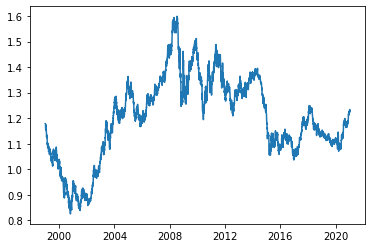

In [9]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

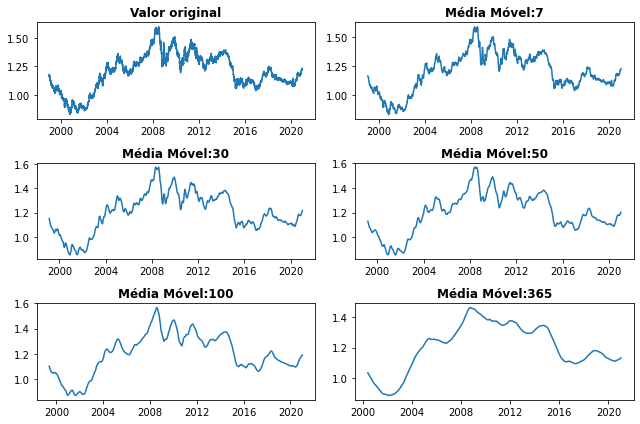

In [10]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Valor original', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Média Móvel:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() 
plt.show()

In [11]:
# Média móvel de 30 dias armazenado em uma coluna chamada `euro_to_dollar`
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


### Storytelling

#### Projeto Guiado


In [12]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) 
                   & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) 
       & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017)
        & (bush_obama_trump['Time'].dt.year < 2021)]

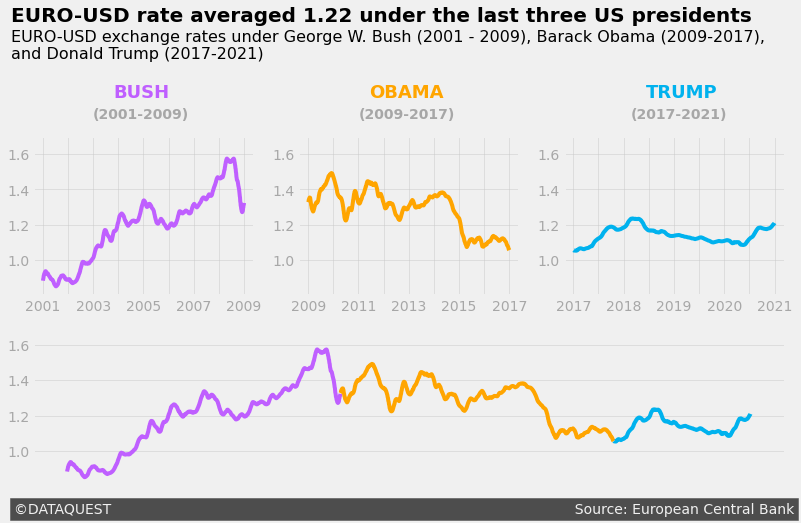

In [13]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(729916.0, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

#### Projeto para o Real Brasileiro

In [16]:
exchange_rates.rename(columns={'[Brazilian real ]': 'BRL_real'}, inplace=True) # padronizando para trabalhar com os dados
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],BRL_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [17]:
exchange_rates['BRL_real'].value_counts()

-         61
2.7570     4
3.0909     4
3.3277     4
3.2395     4
          ..
3.0683     1
3.1035     1
3.0836     1
3.1039     1
1.8718     1
Name: BRL_real, Length: 4854, dtype: int64



*   Limpar a coluna Real;
*   novo vetor (euro_to_dollar_to_real) com a  cotação do DólarXRealXEuro.



In [18]:
euro_to_dollar_to_real = euro_to_dollar.copy()
euro_to_dollar_to_real['BRL_real'] = exchange_rates['BRL_real']
euro_to_dollar_to_real.head()

,Time,US_dollar,rolling_mean,BRL_real
0,1999-01-04,1.1789,NaN,6.5748
1,1999-01-05,1.1790,NaN,6.5172
2,1999-01-06,1.1743,NaN,6.5119
3,1999-01-07,1.1632,NaN,6.5517
4,1999-01-08,1.1659,NaN,6.3241


In [19]:
euro_to_dollar_to_real['BRL_real'] = exchange_rates['BRL_real']
euro_to_dollar_to_real = euro_to_dollar_to_real[euro_to_dollar_to_real['BRL_real'] != '-']
euro_to_dollar_to_real['BRL_real'] = euro_to_dollar_to_real['BRL_real'].astype(float)
euro_to_dollar_to_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5576 non-null   datetime64[ns]
 1   US_dollar     5576 non-null   float64       
 2   rolling_mean  5547 non-null   float64       
 3   BRL_real      5308 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 217.8 KB


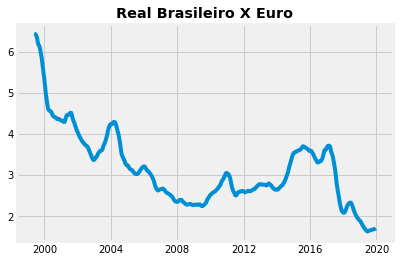

In [20]:
plt.plot(euro_to_dollar_to_real['Time'],
         euro_to_dollar_to_real['BRL_real'].rolling(100).mean())
plt.title('Real Brasileiro X Euro', weight='bold')
plt.show()

In [21]:
#Taxa de cambio do Euro e do dólar, agora em relação ao Real brasileiro
brl_to_euro_to_dollar = euro_to_dollar_to_real[['Time', 'BRL_real']].copy()
brl_to_euro_to_dollar.rename(columns={'BRL_real': 'euro_rate'}, inplace=True)
brl_to_euro_to_dollar['dollar_rate'] = euro_to_dollar_to_real['BRL_real']/euro_to_dollar_to_real['US_dollar']

brl_to_euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         5576 non-null   datetime64[ns]
 1   euro_rate    5308 non-null   float64       
 2   dollar_rate  5308 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 174.2 KB


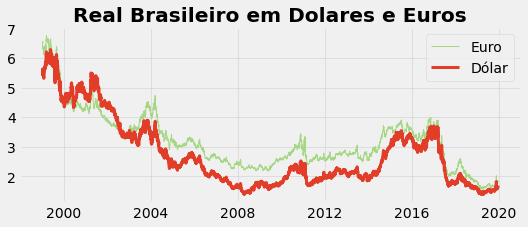

In [22]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(brl_to_euro_to_dollar['Time'],
        brl_to_euro_to_dollar['euro_rate'],
        linewidth=1, color='#A6D785', label = 'Euro')

### Highlighting the 2007-2008 period
ax.plot(brl_to_euro_to_dollar['Time'],
        brl_to_euro_to_dollar['dollar_rate'],
        linewidth=3, color='#e23d28', label = 'Dólar')

### Add some transparency to the grid
ax.grid(alpha=0.5)
plt.title('Real Brasileiro em Dolares e Euros', weight='bold')
plt.legend()
plt.show()

In [23]:
brl_to_euro_to_dollar['dollar_rolling_mean'] = brl_to_euro_to_dollar['dollar_rate'].rolling(50).mean()
brl_to_euro_to_dollar['euro_rolling_mean'] = brl_to_euro_to_dollar['euro_rate'].rolling(50).mean()

In [24]:
todos_presidentes = brl_to_euro_to_dollar.copy(
                   )[(brl_to_euro_to_dollar['Time'].dt.year >= 2000) & (brl_to_euro_to_dollar['Time'].dt.year < 2021)]
fhc = todos_presidentes.copy(
       )[todos_presidentes['Time'].dt.year < 2002]
lula = todos_presidentes.copy(
       )[(todos_presidentes['Time'].dt.year >= 2002) & (todos_presidentes['Time'].dt.year < 2010)]
dilma = todos_presidentes.copy(
       )[(todos_presidentes['Time'].dt.year >= 2010) & ((todos_presidentes['Time'].dt.year < 2017) & (todos_presidentes['Time'].dt.month < 9))]
temer = todos_presidentes.copy(
       )[((todos_presidentes['Time'].dt.year >= 2016) & (todos_presidentes['Time'].dt.month >= 9))  & (todos_presidentes['Time'].dt.year < 2019)]
jair = todos_presidentes.copy(
       )[(todos_presidentes['Time'].dt.year >= 2019)  & (todos_presidentes['Time'].dt.year < 2022)]
# presidentes = [fhc, lula, dilma, temer, bozo]
# anos = [2000,2001,2002.2003,2004,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

C:\Users\julia\AppData\Local\Temp/ipykernel_6584/1902143469.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1_fhc.set_xticklabels(['2000', '', '', '2001', '', '', '2002'],
C:\Users\julia\AppData\Local\Temp/ipykernel_6584/1902143469.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2_lula.set_xticklabels(['', '2003', '', '', '', '2007', '', '', '', '2011'],
C:\Users\julia\AppData\Local\Temp/ipykernel_6584/1902143469.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3_dilma.set_xticklabels(['', '2012', '', '', '2014', '', '',
C:\Users\julia\AppData\Local\Temp/ipykernel_6584/1902143469.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4_temer.set_xticklabels(['', '2016', '',  '', '2017', '', '', '2018'],
C:\Users\julia\AppData\Local\Temp/ipykernel_6584/1902143469.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
 

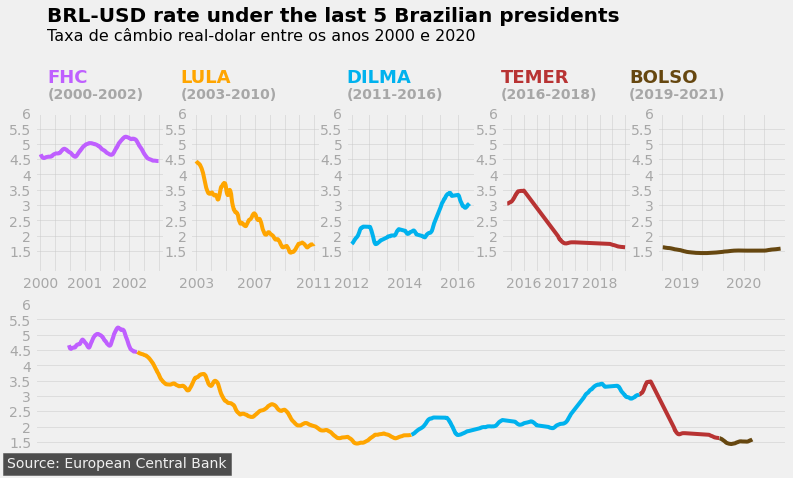

In [25]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1_fhc = plt.subplot(2,5,1)
ax2_lula = plt.subplot(2,5,2)
ax3_dilma = plt.subplot(2,5,3)
ax4_temer = plt.subplot(2,5,4)
ax5_jair = plt.subplot(2,5,5)
ax6_resultado = plt.subplot(2,1,2)
axes = [ax1_fhc, ax2_lula, ax3_dilma, ax4_temer, ax5_jair, ax6_resultado]

# Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
    ax.set_yticklabels(['1.5', '2','2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    
#Ax1
ax1_fhc.plot(fhc['Time'], fhc['dollar_rolling_mean'],
        color='#BF5FFF')
ax1_fhc.set_xticklabels(['2000', '', '', '2001', '', '', '2002'],
                   alpha=0.3)
ax1_fhc.text(11000, 7.0, 'FHC', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1_fhc.text(11000, 6.5, '(2000-2002)', weight='bold',
        alpha=0.3)

#Ax2
ax2_lula.plot(lula['Time'], lula['dollar_rolling_mean'],
        color='#ffa500')
ax2_lula.set_xticklabels(['', '2003', '', '', '', '2007', '', '', '', '2011'],
                   alpha=0.3)
ax2_lula.text(11300, 7.0, 'LULA', fontsize=18, weight='bold',
        color='#ffa500')
ax2_lula.text(11300, 6.5, '(2003-2010)', weight='bold',
         alpha=0.3)


#Ax3
ax3_dilma.plot(dilma['Time'], dilma['dollar_rolling_mean'],
        color='#00B2EE')
ax3_dilma.set_xticklabels(['', '2012', '', '', '2014', '', '',
                     '2016'],
                   alpha=0.3)
ax3_dilma.text(14500, 7.0, 'DILMA', fontsize=18, weight='bold',
        color='#00B2EE')
ax3_dilma.text(14500, 6.5, '(2011-2016)', weight='bold',
         alpha=0.3)

#Ax4
ax4_temer.plot(temer['Time'], temer['dollar_rolling_mean'],
        color='#b83333')
ax4_temer.set_xticklabels(['', '2016', '',  '', '2017', '', '', '2018'],
                   alpha=0.3)
ax4_temer.text(17000, 7.0, 'TEMER', fontsize=18, weight='bold',
        color='#b83333')
ax4_temer.text(17000, 6.5, '(2016-2018)', weight='bold',
         alpha=0.3)

#Ax5
ax5_jair.plot(jair['Time'], jair['dollar_rolling_mean'],
        color='#664710')
ax5_jair.set_xticklabels(['', '2019', '', '', '2020', '', '', '2021'],
                   alpha=0.3)
ax5_jair.text(17800, 7.0, 'BOLSO', fontsize=18, weight='bold', color='#664710')
ax5_jair.text(17800, 6.5, '(2019-2021)', weight='bold', alpha=0.3)

# Ax4
ax6_resultado.plot(fhc['Time'], fhc['dollar_rolling_mean'],
        color='#BF5FFF')
ax6_resultado.plot(lula['Time'], lula['dollar_rolling_mean'],
        color='#ffa500')
ax6_resultado.plot(dilma['Time'], dilma['dollar_rolling_mean'],
        color='#00B2EE')
ax6_resultado.plot(temer['Time'], temer['dollar_rolling_mean'],
        color='#b83333')
ax6_resultado.plot(jair['Time'], jair['dollar_rolling_mean'],
        color='#664710')
ax6_resultado.grid(alpha=0.5)
ax6_resultado.set_xticks([])

### Adding a title and a subtitle
ax1_fhc.text(11000, 9, 'BRL-USD rate under the last 5 Brazilian presidents',
         fontsize=20, weight='bold')
ax1_fhc.text(11000, 8.4, '''Taxa de câmbio real-dolar entre os anos 2000 e 2020''', fontsize=16)

### Adding a signature
ax6_resultado.text(10300, 0.65,'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()